# 9CR_vocab_go_normal_crmgenes.ipynb


6/9/2021 - 

similar to dk Fig 6A combinatorl motif go stuff 
# plots

# 1 TF expression by tissue

# 2. Dot plot to connect cooperative TFs
# 3. go terms associated with target genes of cooperative TFS

In [1]:
library(tidyverse)
library(pheatmap)

library(RColorBrewer)
library(clusterProfiler)
library(ReactomePA)
library(annotate)
library( org.Hs.eg.db ) 
library(AnnotationDbi) 
library(Biobase)


save_pheatmap_png <- function(x, filename, width=1200, height=1000, res = 200) {
  png(filename, width = width, height = height, res = res)
  grid::grid.newpage()
  grid::grid.draw(x$gtable)
  dev.off()
}
save_pheatmap_pdf <- function(x, filename, width=7, height=7) {
   stopifnot(!missing(x))
   stopifnot(!missing(filename))
   pdf(filename, width=width, height=height)
   grid::grid.newpage()
   grid::grid.draw(x$gtable)
   dev.off()
}

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.4
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Registered S3 method overwritten by 'enrichplot':
  method               from
  fortify.enrichResult DOSE

clusterProfiler v3.14.0  For help: https://guangchuangyu.github.io/software/clusterProfiler

If you use clusterProfiler in published research, please cite:
Guangchuang Yu, Li-Gen Wang, Yanyan Han, Qing-Yu He. clusterProfiler: an R package for comparing biological themes among gene clusters. OMICS: A Journal of Integrative Biology. 2012, 16(5):284-287.


Attaching package: ‘clusterProfiler’


The following object is masked from ‘package:purrr’:

    simplify


ReactomePA v1.30.0  For help: https://gua

In [2]:
save_prefix ='../data/processed/fig7_vocab_go/'

In [3]:
tissue_colors = read.csv( '../data/processed/fig3_footprinting/tissue_colors.csv',stringsAsFactors=F)
tissue_colors

tissue,color
<chr>,<chr>
Airway,#4A195D
Astrocytes,#A8EAFF
Bladder,#C2A7D2
Colon,#F5AF1A
Esophageal,#FFDA89
GDSD0,#240201
GDSD3,#4E0A05
GDSD6,#A22633
GM12878,#8F99AC



# 1 TF expression by tissue

# 2. Dot plot to connect cooperative TFs


In [4]:
vocab_df = read.csv('../data/processed/mpra/results_df_piv_match_count.csv',
                                     stringsAsFactor=F)
normal_vocab_df = vocab_df%>%
    filter(tissue!='MM')%>%
    filter(tissue!='SCC')
normal_vocab_df_coop = normal_vocab_df%>%
    filter(consensus_class=='AND')%>%
    arrange(tissue,vocab)%>%
    mutate(index=row_number())%>%
    left_join(tissue_colors, by='tissue')
str(normal_vocab_df_coop)
normal_vocab_df_coop1 = normal_vocab_df_coop[,c("tf1",'index','tissue','color')]
colnames(normal_vocab_df_coop1) = c("tf_name",'number','tissue','color')
normal_vocab_df_coop2 = normal_vocab_df_coop[,c("tf2",'index','tissue','color')]
colnames(normal_vocab_df_coop2) = c("tf_name",'number','tissue','color')
normal_vocab_df_long = rbind(normal_vocab_df_coop1, normal_vocab_df_coop2)
normal_vocab_df_long$score = .3
str(normal_vocab_df_long)

'data.frame':	33 obs. of  12 variables:
 $ X              : int  19 57 108 112 132 134 135 157 180 194 ...
 $ vocab          : chr  "E2F7::THAP1" "FOXM1::KLF15" "KLF15::OTX1" "KLF15::SNAI2" ...
 $ tissue         : chr  "Colon" "Colon" "Colon" "Colon" ...
 $ mpra_tissue    : chr  "Colon" "Colon" "Colon" "Colon" ...
 $ class          : chr  "LEADING_B|AND|OR|LEADING_B|other|other|other|AND|other|other" "AND|AND|other|other|other|other|LEADING_B|other|OR|other" "other|other|other|other|other|AND|OR|other|OR|AND" "AND|other|AND|OR|other|OR|other|other|other|other" ...
 $ instance       : chr  "1|10|2|3|4|5|6|7|8|9" "1|10|2|3|4|5|6|7|8|9" "1|10|2|3|4|5|6|7|8|9" "1|10|2|3|4|5|6|7|8|9" ...
 $ count          : int  10 10 10 10 10 10 10 10 10 10 ...
 $ consensus_class: chr  "AND" "AND" "AND" "AND" ...
 $ tf1            : chr  "E2F7" "FOXM1" "KLF15" "KLF15" ...
 $ tf2            : chr  "THAP1" "KLF15" "OTX1" "SNAI2" ...
 $ index          : int  1 2 3 4 5 6 7 8 9 10 ...
 $ color          : chr  "

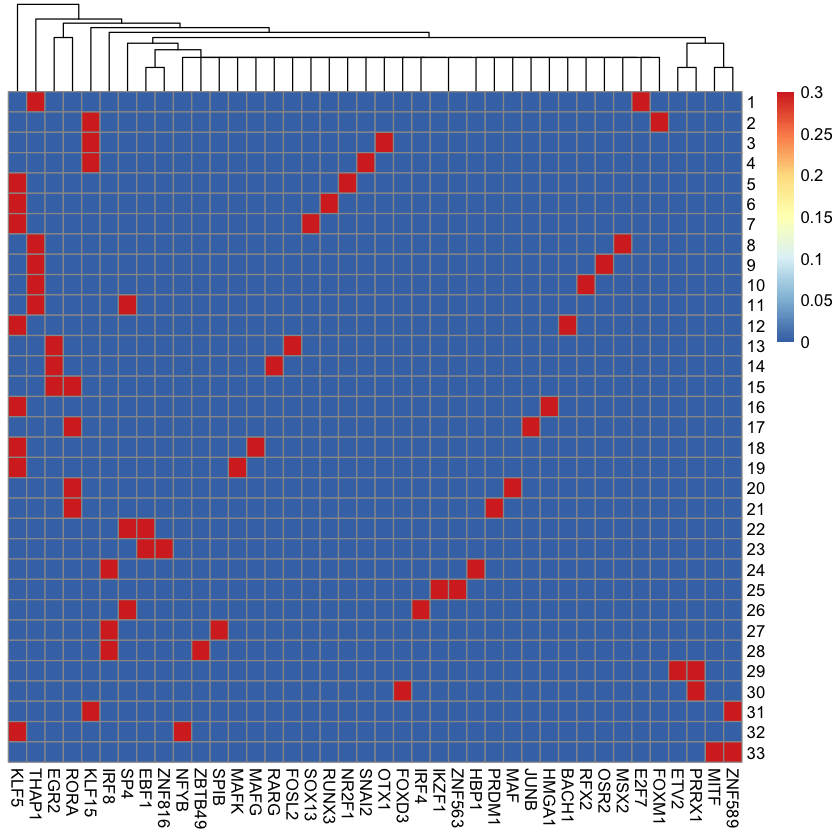

In [5]:
normal_vocab_df_spread = normal_vocab_df_long%>%
    dplyr::select(tf_name, score,number)%>%
    pivot_wider(names_from = tf_name, values_from = score)%>%
    column_to_rownames("number")
normal_vocab_df_spread[is.na(normal_vocab_df_spread)] = 0
p = pheatmap(normal_vocab_df_spread,
        cluster_row=F)
tf_order = colnames(normal_vocab_df_spread)[p$tree_col[['order']]]

In [6]:
rna_tpm_file_tissue = '../data/interim/rna/tissue_tpm_sym.csv'
rna_df_tissue = read.csv(rna_tpm_file_tissue, row.names=1,stringsAsFactors=F,check.names = FALSE)
rna_df_tissue = rna_df_tissue[tf_order,]
rna_df_tissue$SCC = rowMeans(rna_df_tissue[,c('A431-CTRLi','CAL27-CTRLi','SCC13-CTRLi')])
rna_df_tissue$MC = rowMeans(rna_df_tissue[,c('COLO_SCR_DMSO','SKMEL5_SCR_DMSO','WM_SCR_DMSO')])
rna_df_tissue_log = log2(rna_df_tissue+1)
rna_df_tissue_norm = as.data.frame(scale(rna_df_tissue_log, center = TRUE, scale = TRUE))
rna_df_tissue_norm[rna_df_tissue_norm>2] = 2
rna_df_tissue_norm[rna_df_tissue_norm < -2] = -2
rna_df_tissue_log[rna_df_tissue_log>5] = 5
head(rna_df_tissue_norm)

,A431-CTRLi,A431-p63i,Airway,Astrocytes,Bladder,CAL27-CTRLi,CAL27-p63i,COLO_SCR_DMSO,COLO_SCR_PLX,COLO_shMITF_DMSO,⋯,SKMEL5_shMITF-DMSO,SKMEL5_shMITF_PLX,Thyroid,Uterine,WM_SCR_DMSO,WM_SCR_PLX,WM_shMITF_DMSO,WM_shMITF_PLX,SCC,MC
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
KLF5,2.0000000,2.0000000,1.7472637,0.28935135,1.7339030,1.4911281,2.0000000,0.07275309,-0.5476654,0.3985782,⋯,-0.64069899,-0.49270965,1.7507016,1.9036646,-0.73854803,-1.0132970,-0.6304997,-0.6693286,2.0000000,-0.493437343
THAP1,-0.4149097,-0.1749179,0.2862481,-0.01073578,0.1227209,-0.1856410,-0.3138267,0.35677933,0.1548815,0.4644142,⋯,0.13706083,-0.07424225,0.1221324,0.1605152,-0.02851179,-0.2176116,-0.0755267,-0.1154616,-0.2902820,0.008515788
EGR2,0.3116889,-0.3632370,-0.8715257,-0.72393839,-0.9420195,-0.3633742,-0.0429053,-0.75595115,-1.0647431,-0.4025918,⋯,-0.94187584,-0.72644567,-0.8776981,-0.9218977,-0.07294838,-0.4742509,0.2923302,-0.4775850,-0.1875158,-0.572775784
RORA,-0.8495551,-0.6848109,-0.4288192,0.25854269,-0.3494355,-0.8544848,-0.8830579,-0.06474451,0.0562526,-0.1302450,⋯,0.03585555,0.26993968,-0.2224507,-0.7867307,-0.70075238,-0.3564622,-0.6842909,-0.5951287,-0.3689020,-0.277537445
KLF15,-0.9216621,-0.9505245,-0.6091920,-0.98447605,-0.9382934,-0.8681577,-0.9694608,-0.81872493,-0.7102751,-0.5724783,⋯,-0.13759369,-0.59299857,-0.1417015,-0.9379567,-0.97743806,-0.8201323,-0.7776889,-0.8375176,-0.9666945,-0.674622016
IRF8,-0.9356044,-1.0046736,-0.9254406,-0.91341194,-0.8706966,-0.8891731,-1.0055493,-1.05653286,-1.0801220,-1.0378740,⋯,-0.99641484,-0.99431183,-0.1025435,-0.8424403,-1.08790064,-1.2350747,-1.1209737,-1.1889238,-0.9889146,-1.176920559


In [7]:
tissue_colors_filt = filter(tissue_colors, tissue %in%unique(normal_vocab_df_long$tissue))
tissue_colors_filt

tissue,color
<chr>,<chr>
Colon,#F5AF1A
GDSD6,#A22633
GM12878,#8F99AC
Melanocytes,#189BDD


In [8]:
length(tf_order)
tf_order

[1] 40

[1] "KLF5"   "THAP1"  "EGR2"   "RORA"   "KLF15"  "IRF8"   "SP4"    "EBF1"  
 [9] "ZNF816" "NFYB"   "ZBTB49" "SPIB"   "MAFK"   "MAFG"   "RARG"   "FOSL2" 
[17] "SOX13"  "RUNX3"  "NR2F1"  "SNAI2"  "OTX1"   "FOXD3"  "IRF4"   "IKZF1" 
[25] "ZNF563" "HBP1"   "PRDM1"  "MAF"    "JUNB"   "HMGA1"  "BACH1"  "RFX2"  
[33] "OSR2"   "MSX2"   "E2F7"   "FOXM1"  "ETV2"   "PRRX1"  "MITF"   "ZNF589"

In [9]:
# tf_order[!(tf_order %in% tf_order_manual)]

In [10]:
# manual 
tf_order_manual = c('KLF5','KLF15','FOXM1','SOX13','RUNX3','NR2F1','SNAI2','OTX1','E2F7','THAP1','RFX2','OSR2','MSX2',
             'MAFK','MAFG','MAF','HMGA1','BACH1','EGR2','RORA','JUNB','RARG','FOSL2','PRDM1',
                    'IRF8','HBP1','SPIB','ZBTB49','IRF4','SP4','EBF1','ZNF816','IKZF1','ZNF563',
                    'NFYB','ZNF589','MITF','ETV2','PRRX1','FOXD3'
            )
length(unique(tf_order_manual))
tf_order = tf_order_manual

[1] 40

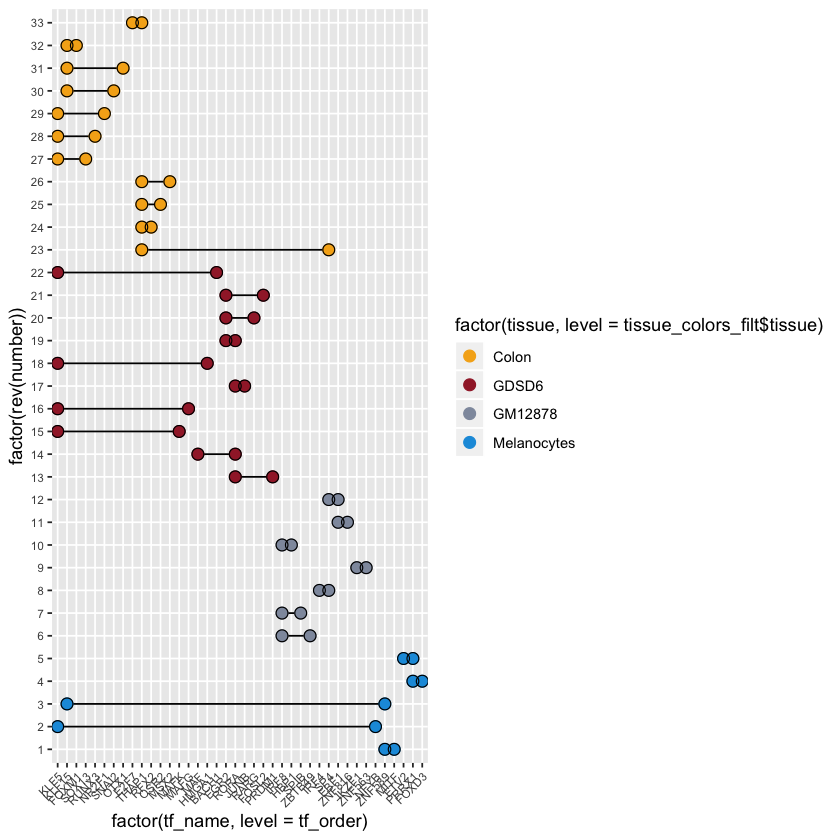

In [11]:
p = ggplot(normal_vocab_df_long, aes(x=factor(tf_name,level=tf_order),y= factor(rev(number)),
                                          color=factor(tissue, level=tissue_colors_filt$tissue)))+
    geom_line(aes(group = factor(number)),color='black')+
    geom_point(aes(size=score),size = 3)+ 
    scale_color_manual(values=tissue_colors_filt$color)+
    geom_point(aes(size=score), size = 3,colour="black",pch=21)+
    theme(axis.text.y = element_text(size=7),
          axis.text.x = element_text(size=7, angle = 45,hjust=1))
p 
ggsave(file = paste0(save_prefix, "normal_vocab_tissue_pairs.eps"),height=4.5, width=8.5)
#

In [12]:
rna_df_tissue['SP4',tissue_colors_filt$tissue]#c('GDSD0','GDSD3','GDSD6','SCC','A431-CTRLi','CAL27-CTRLi','SCC13-CTRLi')]

,Colon,GDSD6,GM12878,Melanocytes
,<dbl>,<dbl>,<dbl>,<dbl>
SP4,1.22,0.93,3.575,0.995


pdf 
  2

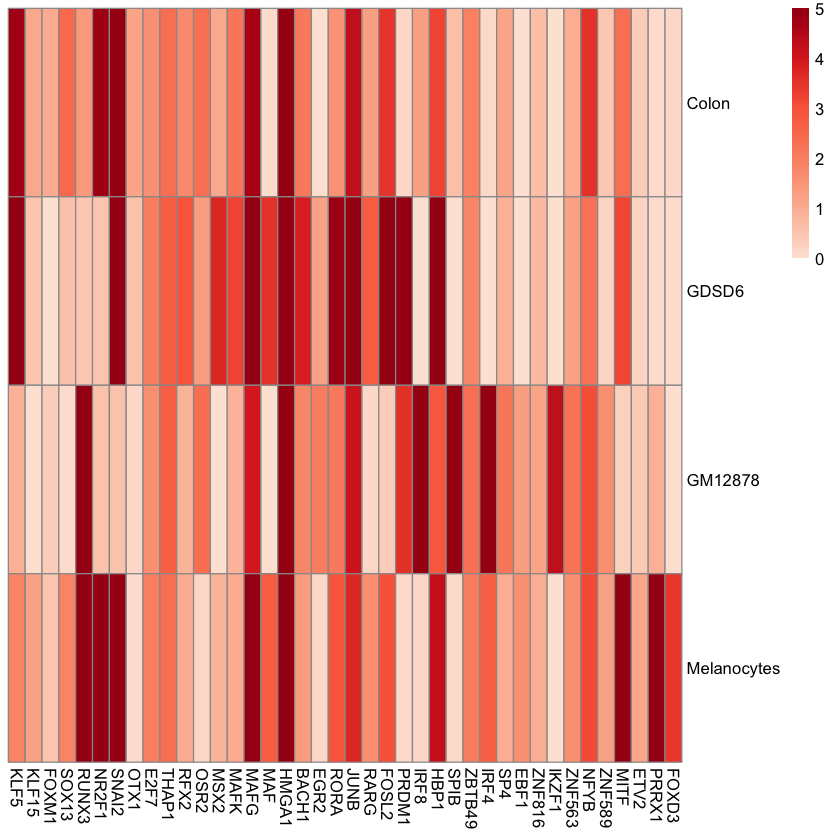

In [13]:
p_genexp = pheatmap(t(rna_df_tissue_log[tf_order,tissue_colors_filt$tissue]),
                    color = colorRampPalette(brewer.pal(n =6, name ="Reds"))(100),

                    cluster_rows=F,cluster_cols=F)
save_pheatmap_pdf(p_genexp, paste0(save_prefix, 'normal_vocab_rna_heatmap.pdf'),  height=2,width=9) 

# 3. go terms associated with target genes of cooperative TFS

In [96]:
read_genes = function(filename){
    print(filename)
    target_genes = read.csv(filename,header=FALSE,stringsAsFactors=F)$V1
    print(length(target_genes))
    target_genes_entrez = bitr(target_genes, fromType="SYMBOL", toType="ENTREZID", OrgDb="org.Hs.eg.db")$ENTREZID
    print(length(target_genes_entrez))
    return(target_genes_entrez)
}

In [97]:
# vocab_list = c('ARNT::SP1', 'BACH1::KLF5', 'E2F6::SP1', 'E2F7::THAP1',
#        'EBF1::SP4', 'EGR1::SP3', 'EGR2::FOSL2', 'EGR2::NFE2L1',
#        'EGR2::RARG', 'EGR2::RORA', 'EN2::STAT1', 'ETV2::PRRX1',
#        'FOXD3::PRRX1', 'FOXM1::KLF15', 'HBP1::IRF8', 'HBP1::STAT1',
#        'HMGA1::KLF5', 'IKZF1::ZNF563', 'IRF4::SP4', 'IRF8::SPIB',
#        'IRF8::ZBTB49', 'KLF15::OTX1', 'KLF15::SNAI2', 'KLF15::ZNF589',
#        'KLF16::TFAP2C', 'KLF4::KLF5', 'KLF5::MAFG', 'KLF5::MAFK',
#        'KLF5::NFYB', 'KLF5::NR2F1', 'KLF5::RUNX3', 'KLF5::SOX13',
#        'MAF::RORA', 'MAZ::SP1', 'MITF::ZNF589', 'NFATC4::STAT1',
#        'NFE2L1::NR3C1', 'NFE2L1::TBX15', 'NFE2L1::ZBTB49', 'OSR2::THAP1',
#        'PRDM1::RORA', 'SOX10::SOX13', 'SOX10::SP4', 'SP1::TFDP1',
#        'SP1::ZBTB14', 'SP1::ZBTB17', 'SP4::THAP1')# see 17_vocab_classes


In [98]:
normal_vocab_df_coop = normal_vocab_df_coop%>%
    mutate(vocab_file=str_c(tissue, '_',tf1, '-',tf2))

In [99]:
vocab_list = normal_vocab_df_coop$vocab_file
print(vocab_list)

 [1] "Colon_E2F7-THAP1"         "Colon_FOXM1-KLF15"       
 [3] "Colon_KLF15-OTX1"         "Colon_KLF15-SNAI2"       
 [5] "Colon_KLF5-NR2F1"         "Colon_KLF5-RUNX3"        
 [7] "Colon_KLF5-SOX13"         "Colon_MSX2-THAP1"        
 [9] "Colon_OSR2-THAP1"         "Colon_RFX2-THAP1"        
[11] "Colon_SP4-THAP1"          "GDSD6_BACH1-KLF5"        
[13] "GDSD6_EGR2-FOSL2"         "GDSD6_EGR2-RARG"         
[15] "GDSD6_EGR2-RORA"          "GDSD6_HMGA1-KLF5"        
[17] "GDSD6_JUNB-RORA"          "GDSD6_KLF5-MAFG"         
[19] "GDSD6_KLF5-MAFK"          "GDSD6_MAF-RORA"          
[21] "GDSD6_PRDM1-RORA"         "GM12878_EBF1-SP4"        
[23] "GM12878_EBF1-ZNF816"      "GM12878_HBP1-IRF8"       
[25] "GM12878_IKZF1-ZNF563"     "GM12878_IRF4-SP4"        
[27] "GM12878_IRF8-SPIB"        "GM12878_IRF8-ZBTB49"     
[29] "Melanocytes_ETV2-PRRX1"   "Melanocytes_FOXD3-PRRX1" 
[31] "Melanocytes_KLF15-ZNF589" "Melanocytes_KLF5-NFYB"   
[33] "Melanocytes_MITF-ZNF589" 


In [100]:
# create a list of all possible entrez ids that you care about
all_genes = c()
for (vocab in vocab_list){
    filename = paste0(save_prefix, 'vocab_genesets/', vocab, '.txt')
    genes = read_genes(filename)
    all_genes = c(all_genes, genes)
}
all_genes = unique(all_genes)
length(all_genes)

[1] "../data/processed/fig7_vocab_go/vocab_genesets/Colon_E2F7-THAP1.txt"
[1] 245


'select()' returned 1:1 mapping between keys and columns



[1] 245
[1] "../data/processed/fig7_vocab_go/vocab_genesets/Colon_FOXM1-KLF15.txt"
[1] 140


'select()' returned 1:1 mapping between keys and columns



[1] 140
[1] "../data/processed/fig7_vocab_go/vocab_genesets/Colon_KLF15-OTX1.txt"
[1] 324


'select()' returned 1:1 mapping between keys and columns



[1] 324
[1] "../data/processed/fig7_vocab_go/vocab_genesets/Colon_KLF15-SNAI2.txt"
[1] 250


'select()' returned 1:1 mapping between keys and columns



[1] 250
[1] "../data/processed/fig7_vocab_go/vocab_genesets/Colon_KLF5-NR2F1.txt"
[1] 366


'select()' returned 1:1 mapping between keys and columns



[1] 366
[1] "../data/processed/fig7_vocab_go/vocab_genesets/Colon_KLF5-RUNX3.txt"
[1] 127


'select()' returned 1:1 mapping between keys and columns



[1] 127
[1] "../data/processed/fig7_vocab_go/vocab_genesets/Colon_KLF5-SOX13.txt"
[1] 627


'select()' returned 1:1 mapping between keys and columns



[1] 627
[1] "../data/processed/fig7_vocab_go/vocab_genesets/Colon_MSX2-THAP1.txt"
[1] 205


'select()' returned 1:1 mapping between keys and columns



[1] 205
[1] "../data/processed/fig7_vocab_go/vocab_genesets/Colon_OSR2-THAP1.txt"
[1] 131


'select()' returned 1:1 mapping between keys and columns



[1] 131
[1] "../data/processed/fig7_vocab_go/vocab_genesets/Colon_RFX2-THAP1.txt"
[1] 150


'select()' returned 1:1 mapping between keys and columns



[1] 150
[1] "../data/processed/fig7_vocab_go/vocab_genesets/Colon_SP4-THAP1.txt"
[1] 395


'select()' returned 1:1 mapping between keys and columns



[1] 395
[1] "../data/processed/fig7_vocab_go/vocab_genesets/GDSD6_BACH1-KLF5.txt"
[1] 100


'select()' returned 1:1 mapping between keys and columns



[1] 100
[1] "../data/processed/fig7_vocab_go/vocab_genesets/GDSD6_EGR2-FOSL2.txt"
[1] 255


'select()' returned 1:1 mapping between keys and columns



[1] 255
[1] "../data/processed/fig7_vocab_go/vocab_genesets/GDSD6_EGR2-RARG.txt"
[1] 196


'select()' returned 1:1 mapping between keys and columns



[1] 196
[1] "../data/processed/fig7_vocab_go/vocab_genesets/GDSD6_EGR2-RORA.txt"
[1] 205


'select()' returned 1:1 mapping between keys and columns



[1] 205
[1] "../data/processed/fig7_vocab_go/vocab_genesets/GDSD6_HMGA1-KLF5.txt"
[1] 284


'select()' returned 1:1 mapping between keys and columns



[1] 284
[1] "../data/processed/fig7_vocab_go/vocab_genesets/GDSD6_JUNB-RORA.txt"
[1] 120


'select()' returned 1:1 mapping between keys and columns



[1] 120
[1] "../data/processed/fig7_vocab_go/vocab_genesets/GDSD6_KLF5-MAFG.txt"
[1] 159


'select()' returned 1:1 mapping between keys and columns



[1] 159
[1] "../data/processed/fig7_vocab_go/vocab_genesets/GDSD6_KLF5-MAFK.txt"
[1] 144


'select()' returned 1:1 mapping between keys and columns



[1] 144
[1] "../data/processed/fig7_vocab_go/vocab_genesets/GDSD6_MAF-RORA.txt"
[1] 109


'select()' returned 1:1 mapping between keys and columns



[1] 109
[1] "../data/processed/fig7_vocab_go/vocab_genesets/GDSD6_PRDM1-RORA.txt"
[1] 91


'select()' returned 1:1 mapping between keys and columns



[1] 91
[1] "../data/processed/fig7_vocab_go/vocab_genesets/GM12878_EBF1-SP4.txt"
[1] 152


'select()' returned 1:1 mapping between keys and columns



[1] 152
[1] "../data/processed/fig7_vocab_go/vocab_genesets/GM12878_EBF1-ZNF816.txt"
[1] 96


'select()' returned 1:1 mapping between keys and columns



[1] 96
[1] "../data/processed/fig7_vocab_go/vocab_genesets/GM12878_HBP1-IRF8.txt"
[1] 154


'select()' returned 1:1 mapping between keys and columns



[1] 154
[1] "../data/processed/fig7_vocab_go/vocab_genesets/GM12878_IKZF1-ZNF563.txt"
[1] 136


'select()' returned 1:1 mapping between keys and columns



[1] 136
[1] "../data/processed/fig7_vocab_go/vocab_genesets/GM12878_IRF4-SP4.txt"
[1] 261


'select()' returned 1:1 mapping between keys and columns



[1] 261
[1] "../data/processed/fig7_vocab_go/vocab_genesets/GM12878_IRF8-SPIB.txt"
[1] 191


'select()' returned 1:1 mapping between keys and columns



[1] 191
[1] "../data/processed/fig7_vocab_go/vocab_genesets/GM12878_IRF8-ZBTB49.txt"
[1] 136


'select()' returned 1:1 mapping between keys and columns



[1] 136
[1] "../data/processed/fig7_vocab_go/vocab_genesets/Melanocytes_ETV2-PRRX1.txt"
[1] 45


'select()' returned 1:1 mapping between keys and columns



[1] 45
[1] "../data/processed/fig7_vocab_go/vocab_genesets/Melanocytes_FOXD3-PRRX1.txt"
[1] 21


'select()' returned 1:1 mapping between keys and columns



[1] 21
[1] "../data/processed/fig7_vocab_go/vocab_genesets/Melanocytes_KLF15-ZNF589.txt"
[1] 101


'select()' returned 1:1 mapping between keys and columns



[1] 101
[1] "../data/processed/fig7_vocab_go/vocab_genesets/Melanocytes_KLF5-NFYB.txt"
[1] 29


'select()' returned 1:1 mapping between keys and columns



[1] 29
[1] "../data/processed/fig7_vocab_go/vocab_genesets/Melanocytes_MITF-ZNF589.txt"
[1] 14


'select()' returned 1:1 mapping between keys and columns



[1] 14


[1] 1182

In [104]:
# takes ~10-20 min

# RUN ONCE
go_table_all_vocab = data.frame()
for (vocab in vocab_list){
    filename = paste0(save_prefix, 'vocab_genesets/', vocab, '.txt')
    genes = read_genes(filename)
    ego <- enrichGO(gene          = genes,
                universe      = all_genes,
                OrgDb         = org.Hs.eg.db,
                ont           = "BP",
                pAdjustMethod = "BH",
                pvalueCutoff  = 1,###SET
                qvalueCutoff  = 1,###SET
        readable      = TRUE)
    
    ego = data.frame(ego)
    print(dim(ego))
    if (dim(ego)[1]>0){
        ego$vocab = vocab
        go_table_all_vocab = rbind(go_table_all_vocab, ego)
    }
}


[1] "../data/processed/fig7_vocab_go/vocab_genesets/Colon_E2F7-THAP1.txt"
[1] 245


'select()' returned 1:1 mapping between keys and columns



[1] 245
[1] 1625    9
[1] "../data/processed/fig7_vocab_go/vocab_genesets/Colon_FOXM1-KLF15.txt"
[1] 140


'select()' returned 1:1 mapping between keys and columns



[1] 140
[1] 1563    9
[1] "../data/processed/fig7_vocab_go/vocab_genesets/Colon_KLF15-OTX1.txt"
[1] 324


'select()' returned 1:1 mapping between keys and columns



[1] 324
[1] 1662    9
[1] "../data/processed/fig7_vocab_go/vocab_genesets/Colon_KLF15-SNAI2.txt"
[1] 250


'select()' returned 1:1 mapping between keys and columns



[1] 250
[1] 1646    9
[1] "../data/processed/fig7_vocab_go/vocab_genesets/Colon_KLF5-NR2F1.txt"
[1] 366


'select()' returned 1:1 mapping between keys and columns



[1] 366
[1] 1690    9
[1] "../data/processed/fig7_vocab_go/vocab_genesets/Colon_KLF5-RUNX3.txt"
[1] 127


'select()' returned 1:1 mapping between keys and columns



[1] 127
[1] 1575    9
[1] "../data/processed/fig7_vocab_go/vocab_genesets/Colon_KLF5-SOX13.txt"
[1] 627


'select()' returned 1:1 mapping between keys and columns



[1] 627
[1] 1691    9
[1] "../data/processed/fig7_vocab_go/vocab_genesets/Colon_MSX2-THAP1.txt"
[1] 205


'select()' returned 1:1 mapping between keys and columns



[1] 205
[1] 1605    9
[1] "../data/processed/fig7_vocab_go/vocab_genesets/Colon_OSR2-THAP1.txt"
[1] 131


'select()' returned 1:1 mapping between keys and columns



[1] 131
[1] 1470    9
[1] "../data/processed/fig7_vocab_go/vocab_genesets/Colon_RFX2-THAP1.txt"
[1] 150


'select()' returned 1:1 mapping between keys and columns



[1] 150
[1] 1495    9
[1] "../data/processed/fig7_vocab_go/vocab_genesets/Colon_SP4-THAP1.txt"
[1] 395


'select()' returned 1:1 mapping between keys and columns



[1] 395
[1] 1664    9
[1] "../data/processed/fig7_vocab_go/vocab_genesets/GDSD6_BACH1-KLF5.txt"
[1] 100


'select()' returned 1:1 mapping between keys and columns



[1] 100
[1] 1408    9
[1] "../data/processed/fig7_vocab_go/vocab_genesets/GDSD6_EGR2-FOSL2.txt"
[1] 255


'select()' returned 1:1 mapping between keys and columns



[1] 255
[1] 1650    9
[1] "../data/processed/fig7_vocab_go/vocab_genesets/GDSD6_EGR2-RARG.txt"
[1] 196


'select()' returned 1:1 mapping between keys and columns



[1] 196
[1] 1578    9
[1] "../data/processed/fig7_vocab_go/vocab_genesets/GDSD6_EGR2-RORA.txt"
[1] 205


'select()' returned 1:1 mapping between keys and columns



[1] 205
[1] 1631    9
[1] "../data/processed/fig7_vocab_go/vocab_genesets/GDSD6_HMGA1-KLF5.txt"
[1] 284


'select()' returned 1:1 mapping between keys and columns



[1] 284
[1] 1676    9
[1] "../data/processed/fig7_vocab_go/vocab_genesets/GDSD6_JUNB-RORA.txt"
[1] 120


'select()' returned 1:1 mapping between keys and columns



[1] 120
[1] 1497    9
[1] "../data/processed/fig7_vocab_go/vocab_genesets/GDSD6_KLF5-MAFG.txt"
[1] 159


'select()' returned 1:1 mapping between keys and columns



[1] 159
[1] 1537    9
[1] "../data/processed/fig7_vocab_go/vocab_genesets/GDSD6_KLF5-MAFK.txt"
[1] 144


'select()' returned 1:1 mapping between keys and columns



[1] 144
[1] 1504    9
[1] "../data/processed/fig7_vocab_go/vocab_genesets/GDSD6_MAF-RORA.txt"
[1] 109


'select()' returned 1:1 mapping between keys and columns



[1] 109
[1] 1528    9
[1] "../data/processed/fig7_vocab_go/vocab_genesets/GDSD6_PRDM1-RORA.txt"
[1] 91


'select()' returned 1:1 mapping between keys and columns



[1] 91
[1] 1424    9
[1] "../data/processed/fig7_vocab_go/vocab_genesets/GM12878_EBF1-SP4.txt"
[1] 152


'select()' returned 1:1 mapping between keys and columns



[1] 152
[1] 1553    9
[1] "../data/processed/fig7_vocab_go/vocab_genesets/GM12878_EBF1-ZNF816.txt"
[1] 96


'select()' returned 1:1 mapping between keys and columns



[1] 96
[1] 1385    9
[1] "../data/processed/fig7_vocab_go/vocab_genesets/GM12878_HBP1-IRF8.txt"
[1] 154


'select()' returned 1:1 mapping between keys and columns



[1] 154
[1] 1509    9
[1] "../data/processed/fig7_vocab_go/vocab_genesets/GM12878_IKZF1-ZNF563.txt"
[1] 136


'select()' returned 1:1 mapping between keys and columns



[1] 136
[1] 1503    9
[1] "../data/processed/fig7_vocab_go/vocab_genesets/GM12878_IRF4-SP4.txt"
[1] 261


'select()' returned 1:1 mapping between keys and columns



[1] 261
[1] 1637    9
[1] "../data/processed/fig7_vocab_go/vocab_genesets/GM12878_IRF8-SPIB.txt"
[1] 191


'select()' returned 1:1 mapping between keys and columns



[1] 191
[1] 1592    9
[1] "../data/processed/fig7_vocab_go/vocab_genesets/GM12878_IRF8-ZBTB49.txt"
[1] 136


'select()' returned 1:1 mapping between keys and columns



[1] 136
[1] 1478    9
[1] "../data/processed/fig7_vocab_go/vocab_genesets/Melanocytes_ETV2-PRRX1.txt"
[1] 45


'select()' returned 1:1 mapping between keys and columns



[1] 45
[1] 883   9
[1] "../data/processed/fig7_vocab_go/vocab_genesets/Melanocytes_FOXD3-PRRX1.txt"
[1] 21


'select()' returned 1:1 mapping between keys and columns



[1] 21
[1] 790   9
[1] "../data/processed/fig7_vocab_go/vocab_genesets/Melanocytes_KLF15-ZNF589.txt"
[1] 101


'select()' returned 1:1 mapping between keys and columns



[1] 101
[1] 1400    9
[1] "../data/processed/fig7_vocab_go/vocab_genesets/Melanocytes_KLF5-NFYB.txt"
[1] 29


'select()' returned 1:1 mapping between keys and columns



[1] 29
[1] 857   9
[1] "../data/processed/fig7_vocab_go/vocab_genesets/Melanocytes_MITF-ZNF589.txt"
[1] 14


'select()' returned 1:1 mapping between keys and columns



[1] 14
[1] 601   9


In [110]:
# go_table_all_vocab%>%filter(pvalue<0.05)

In [111]:
# save go_table_all_vocab
write.csv(go_table_all_vocab, paste0(save_prefix,'go_table_all_vocab.csv'))

In [112]:
dim(go_table_all_vocab)

[1] 48307    10

#### manual step to curate which ones you like


final tabe willb e selected rows

with 
- vocab --> tf1 tf2
- go term
- pval- size
- logfc - color


bring manual table into r --> `go_term_df`

also bring in the tf order from either the rna expression heatmp or the dot plot


tf_order = colnames(normal_vocab_df_spread)[p$tree_col[['order']]] ## RNA expression



y=factor(tf_name,level=rev(tf_order)), ## in the vocab dot plot with the connecting dots

In [7]:
go_table_all_vocab = read.csv(paste0(save_prefix, 'go_table_all_vocab.csv'),row.names=1,stringsAsFactor=F)
head(go_table_all_vocab)

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count,vocab
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<chr>
GO:0070498,GO:0070498,interleukin-1-mediated signaling pathway,9/227,17/1118,0.002666018,0.9990019,0.9990019,MAP3K3/PSMC3/PSMC6/PSME2/RELA/SQSTM1/TNIP2/UBC/UBE2V1,9,Colon_E2F7-THAP1
GO:0007346,GO:0007346,regulation of mitotic cell cycle,24/227,69/1118,0.002713996,0.9990019,0.9990019,AURKAIP1/BCL2L1/CDC20/CDK5RAP3/CEP63/CHMP1A/CUL9/E4F1/FOXA1/GADD45GIP1/LRP5/MDM4/PIM3/PRMT1/PRMT5/PSMC3/PSMC6/PSME2/PTCH1/RAD9A/SFN/SIK1/XRCC3/ZFP36L1,24,Colon_E2F7-THAP1
GO:0060041,GO:0060041,retina development in camera-type eye,6/227,10/1118,0.006639739,0.9990019,0.9990019,CLN8/IMPDH2/LAMB2/LRP5/ROM1/TCIRG1,6,Colon_E2F7-THAP1
GO:0045930,GO:0045930,negative regulation of mitotic cell cycle,15/227,41/1118,0.010371082,0.9990019,0.9990019,AURKAIP1/BCL2L1/CDC20/CDK5RAP3/E4F1/GADD45GIP1/MDM4/PRMT1/PSMC3/PSMC6/PSME2/RAD9A/SFN/XRCC3/ZFP36L1,15,Colon_E2F7-THAP1
GO:0000245,GO:0000245,spliceosomal complex assembly,6/227,11/1118,0.012156723,0.9990019,0.9990019,GEMIN2/NOL3/PRPF6/SNRPC/SNRPD2/SRSF1,6,Colon_E2F7-THAP1
GO:0071559,GO:0071559,response to transforming growth factor beta,9/227,21/1118,0.015005426,0.9990019,0.9990019,FAM89B/FOXH1/GDF15/ID1/ITGA3/STK11/UBC/ZFHX3/ZFP36L1,9,Colon_E2F7-THAP1


In [158]:
# go_table_all_vocab%>%
#     filter(vocab=='Colon_RFX2-THAP1')%>%
#     filter(vocab=='Colon_MSX2-THAP1')%>%
#     filter(pvalue<0.05)

also manually add

GO:00072495	GO:0007249	I-kappaB kinase/NF-kappaB signaling
GO:003030116	GO:0030301	cholesterol transport

GO:0016485	protein processing
GO:0044265 cellular macromolecule catabolic process

In [8]:
# normal_vocab_df = read.csv(paste0(save_prefix, 'normal_vocab_df.csv'))
# normal_vocab_df = left_join(normal_vocab_df, tissue_colors, by='tissue')
# head(normal_vocab_df)
go_terms_to_keep_df  = read.csv(paste0(save_prefix,'go_table_all_vocab_curated_LD_061121.csv'),header=F,stringsAsFactor=F)
dim(go_terms_to_keep_df)
go_terms_to_keep = unique(c(go_terms_to_keep_df$V1,go_terms_to_keep_df$V2))
### MANUAL ADD
go_terms_to_keep = c(go_terms_to_keep,'GO:0016485','GO:0044265', 'GO:00072495','GO:0007249','GO:003030116','GO:0030301')
length(go_terms_to_keep)
go_table_all_vocab_filt = go_table_all_vocab[go_table_all_vocab$ID %in% go_terms_to_keep,]
dim(go_table_all_vocab_filt)

[1] 54  6

[1] 111

[1] 1670   10

In [15]:
go_ids_skin = go_table_all_vocab_filt%>%
    filter(!str_detect(vocab, 'Colon'))%>%
    filter(!str_detect(vocab, 'GM12878'))#%>%
go_ids_skin = unique(go_ids_skin$ID    )
go_ids_skin

[1] "GO:0008544" "GO:0009913" "GO:0030216" "GO:0043588" "GO:0031424"
 [6] "GO:0070268" "GO:0030855" "GO:0030154" "GO:0060429" "GO:0042110"
[11] "GO:0071560" "GO:0022407" "GO:0030856" "GO:0071559" "GO:0016050"
[16] "GO:0046649" "GO:0007179" "GO:0007249" "GO:0034612" "GO:0002684"
[21] "GO:0032388" "GO:0046651" "GO:0030029" "GO:0071356" "GO:0007266"
[26] "GO:0033209" "GO:0051648" "GO:0051650" "GO:0006955" "GO:0050673"
[31] "GO:0016192" "GO:0030036" "GO:0048754" "GO:0050851" "GO:0045087"
[36] "GO:0002285" "GO:0034644" "GO:0050776" "GO:0002429" "GO:0009057"
[41] "GO:0009411" "GO:0016485" "GO:0007015" "GO:0051049" "GO:0002449"
[46] "GO:0009059" "GO:0042113" "GO:0044265" "GO:0046907" "GO:0051336"
[51] "GO:0034645" "GO:0051345" "GO:0030041" "GO:0030833" "GO:0072676"
[56] "GO:0030177" "GO:0030301"

In [160]:
go_term_df = go_table_all_vocab_filt%>%
    filter(pvalue<0.10)%>%
    mutate(neglog10pval = -log10(pvalue))%>%
    mutate(log2count = log2(Count)) %>%
    filter(log2count>1.5)%>%
    separate('vocab',c('tissue','vocab_pair'),remove=FALSE,sep='[_]')%>%
    separate('vocab_pair',c('vocab1','vocab2'),remove=FALSE,sep='[-]')%>%
    mutate(vocab = str_c(vocab1, "::",vocab2))%>%
    left_join(normal_vocab_df_coop[,c('vocab','index')], on='index')
colnames(go_term_df)
go_term_df_long1 = go_term_df[,c("vocab1",'Description','pvalue','Count')]
colnames(go_term_df_long1) = c("tf_name",'Description','pvalue','Count')
go_term_df_long2 = go_term_df[,c("vocab2",'Description','pvalue','Count')]
colnames(go_term_df_long2) = c("tf_name",'Description','pvalue','Count')
go_term_df_long = rbind(go_term_df_long1, go_term_df_long2)
str(go_term_df_long)

Joining, by = "vocab"



[1] "ID"           "Description"  "GeneRatio"    "BgRatio"      "pvalue"      
 [6] "p.adjust"     "qvalue"       "geneID"       "Count"        "vocab"       
[11] "tissue"       "vocab_pair"   "vocab1"       "vocab2"       "neglog10pval"
[16] "log2count"    "index"

'data.frame':	608 obs. of  4 variables:
 $ tf_name    : chr  "E2F7" "E2F7" "E2F7" "E2F7" ...
 $ Description: chr  "response to transforming growth factor beta" "tumor necrosis factor-mediated signaling pathway" "cellular response to transforming growth factor beta stimulus" "transforming growth factor beta receptor signaling pathway" ...
 $ pvalue     : num  0.015 0.0336 0.0336 0.0394 0.0525 ...
 $ Count      : int  9 8 8 7 5 10 80 10 8 8 ...


In [161]:
used_GO_terms = unique(go_term_df$ID)
filter(go_terms_to_keep_df,!((V1 %in% used_GO_terms)|(V2 %in% used_GO_terms)))$V3


character(0)

In [162]:
# go_term_df = go_term_df%>% 
#     filter(!is.na(index))


In [163]:
# normal_vocab_df_coop

In [164]:
unique(go_term_df$index)# missing index none

# normal_vocab_df_coop

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
[26] 26 27 28 29 30 31 32 33

In [165]:
# do the below thing once

go_term_order = unique(go_term_df$Description)


length(go_term_order)

[1] 57

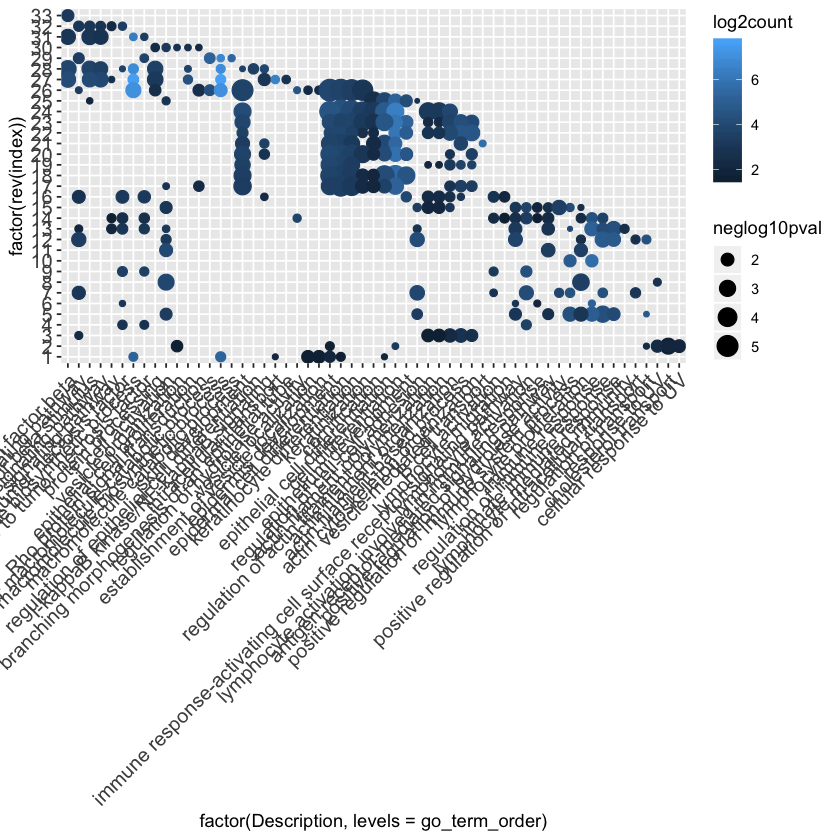

In [166]:
p = ggplot(go_term_df, aes(x= factor(Description,levels=go_term_order),y=factor(rev(index)),
                                          color=log2count, size=neglog10pval))+
    geom_point()+
#     geom_point(aes(size=score),colour="black",pch=21)+# I think this for bordering probably remove
    theme(axis.text.y = element_text(size=12),
          axis.text.x = element_text(size=12, angle = 45,hjust=1))
p 

# manually adjust go_term_order -

Sorry to be nitpicky, but for the GOTerms, can you take these out from the plot:
Rho protein signal transduction
vesicle-mediated transport
actin cytoskeleton organization
actin filament-based process
positive regulation of intracellular transport
And then is there a way to get all these terms together as the melanocyte terms at the right end of the plot (order of terms themselves not important) even though colon and KCD6 vocabs also have signal?
actin filament organization
actin filament polymerization
cellular response to UV
regulation of actin filament polymerization
regulation of transport
response to UV
vesicle localization
vesicle organization
vesicle-mediated transport
intracellular transport
cholesterol transport


Also, if it's not a total pain, I'm thinking these terms should likewise be moved to be next to the GM12878 terms rather than the colon terms:
response to tumor necrosis factor
T cell activation
cellular response to tumor necrosis factor
tumor necrosis factor-mediated signaling pathway

T cell activation
positive regulation of hydrolase activity
innate immune response
response to tumor necrosis factor
lymphocyte activation involved in immune response
lymphocyte mediated immunity
lymphocyte migration
immune response

In [167]:
sort(unique(go_term_df$vocab_pair))

[1] "BACH1-KLF5"   "E2F7-THAP1"   "EBF1-SP4"     "EBF1-ZNF816"  "EGR2-FOSL2"  
 [6] "EGR2-RARG"    "EGR2-RORA"    "ETV2-PRRX1"   "FOXD3-PRRX1"  "FOXM1-KLF15" 
[11] "HBP1-IRF8"    "HMGA1-KLF5"   "IKZF1-ZNF563" "IRF4-SP4"     "IRF8-SPIB"   
[16] "IRF8-ZBTB49"  "JUNB-RORA"    "KLF15-OTX1"   "KLF15-SNAI2"  "KLF15-ZNF589"
[21] "KLF5-MAFG"    "KLF5-MAFK"    "KLF5-NFYB"    "KLF5-NR2F1"   "KLF5-RUNX3"  
[26] "KLF5-SOX13"   "MAF-RORA"     "MITF-ZNF589"  "MSX2-THAP1"   "OSR2-THAP1"  
[31] "PRDM1-RORA"   "RFX2-THAP1"   "SP4-THAP1"

In [168]:
go_term_df_filt = go_term_df%>%
    filter(!(Description %in% c('Rho protein signal transduction',
                                'branching morphogenesis of an epithelial tube',
                               'vesicle-mediated transport',
                               'actin cytoskeleton organization',
                               'actin filament-based process',
                               'positive regulation of intracellular transport',
                                'T cell activation',
                                'positive regulation of hydrolase activity',
                                'regulation of hydrolase activity',
                                'innate immune response',
                                'response to tumor necrosis factor',
                                'lymphocyte activation involved in immune response',
                                'lymphocyte mediated immunity',
                                'lymphocyte migration',
                                'immune response'
                               )))

In [169]:
# go_term_df_filt$Description

In [174]:
# go_term_order
go_term_order  = c('protein processing',
                 'response to transforming growth factor beta',
'cellular response to transforming growth factor beta stimulus',
'transforming growth factor beta receptor signaling pathway',
'positive regulation of Wnt signaling pathway',
'cellular macromolecule biosynthetic process',
'cellular macromolecule catabolic process',
'epithelial cell proliferation',
'macromolecule biosynthetic process',
'macromolecule catabolic process',
'regulation of epithelial cell differentiation',
'I-kappaB kinase/NF-kappaB signaling',
'epidermal cell differentiation',
'epidermis development',
'keratinocyte differentiation',
'skin development',
'keratinization',
'cornification',
'epithelial cell differentiation',
'cell differentiation',
'epithelium development',
'cellular response to tumor necrosis factor',
'tumor necrosis factor-mediated signaling pathway',
'B cell activation',
'immune response-activating cell surface receptor signaling pathway',
'lymphocyte activation',
'antigen receptor-mediated signaling pathway',
'regulation of cell-cell adhesion',
'positive regulation of immune system process',
'lymphocyte proliferation',
'regulation of immune response',
'regulation of transport',
'intracellular transport',
'response to UV',
'cellular response to UV',
'vesicle organization',
'vesicle localization',
'establishment of vesicle localization',
'cholesterol transport',
'actin filament polymerization',
'actin filament organization',
'regulation of actin filament polymerization'
)

In [175]:
# unique(go_term_df_filt$index)

In [176]:
go_term_df_filt%>%
    filter(!(Description %in% go_term_order))

ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count,vocab,tissue,vocab_pair,vocab1,vocab2,neglog10pval,log2count,index
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>


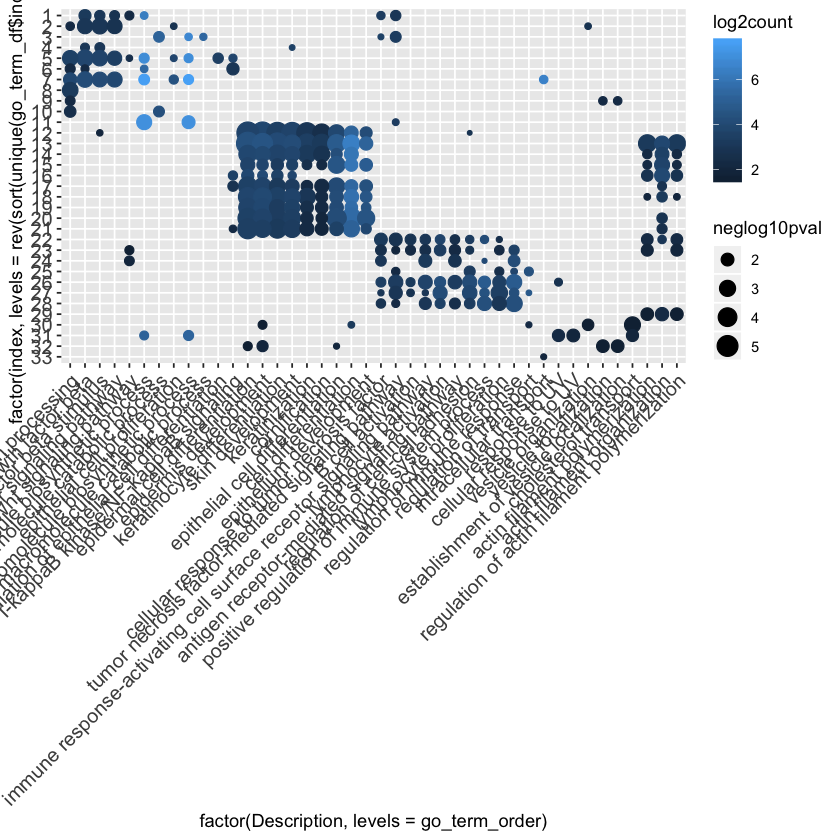

In [206]:
p = ggplot(go_term_df_filt, aes(x= factor(Description,levels=go_term_order),y=factor(index, levels=rev(sort(unique(go_term_df$index)))),
                                          color=log2count, size=neglog10pval))+
    geom_point()+
#     geom_point(aes(size=score),colour="black",pch=21)+# I think this for bordering probably remove
    theme(axis.text.y = element_text(size=12),
          axis.text.x = element_text(size=12, angle = 45,hjust=1))
p 
ggsave(file = paste0(save_prefix, "go_term_df_long.eps"),height=10, width=11.5)
#